In [224]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Task

The given data set contains a user's medical history in the form of whether they have a specific condition or not, their age, height, weight, etc along with the premium they have to pay in INR for insurance. Perform an exploratory data analysis to <b>determine what factors play an important role in determining the premium of the user.</b>

### Exploratory Data Analysis

In [225]:
data = pd.read_csv("Medicalpremium.csv")
data

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000
...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,15000
982,64,1,1,0,0,153,70,0,0,3,28000
983,56,0,1,0,0,155,71,0,0,1,29000
984,47,1,1,0,0,158,73,1,0,1,39000


In [226]:
data.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


So we have following useful details:
<li><b>About Age:</b> 
    Min age is 18 and Max age is 66. Average age of the person in the dataset is about 42 years. </li>
<li>
    <b>About PremiumPrice:</b>
    Min Premium is 15000 and the Max premium is 40000. The average premium is 23000</li>
<li>
    <b>About Weight:</b>
    Min Weight is 51kg and the Max Weight is 132kg. The average Weight is 77kg</li>
<li>
    <b>About Height:</b>
    Min Height is 145cms and the Max Height is 188cms. The average Height is 168cms</li>

### Checking for correlation between premium and other features

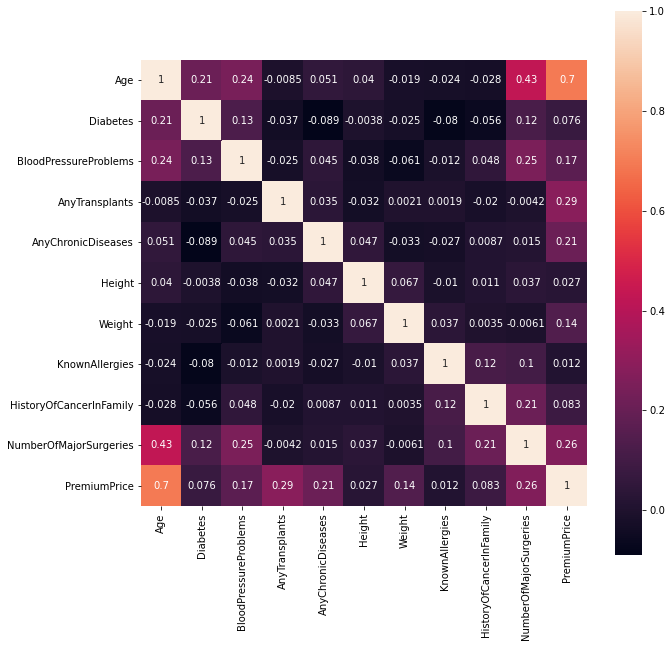

In [227]:

plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), square=True , annot=True, cbar=True)

> Here in the above plot we can see the correlation scores. The higher the score more the related feature or in other words we can say that the feature is impacted by the other feature.

> So when we see that what features are most related to the Premium Price feature, we get that <b>Age</b> is the most related feature as it has the highest value (0.7) in the heatmap other than the diagonal ones. We can say that Age is one of the most important features that decides the premuim price.

> Other than Age, there are other features which have significant scores like after Age, <b>"AnyTransplants, NumberOfMajorSurgeries, AnyChronicDisease, Weight"</b> features play an important role in determining the premuim price.

Some other observations:

> It is also visible that <b>Age is highly related with NumberOfMajorSurgeries.</b> Infact, it is the second highest related feature with a score of 0.43. Logically it can mean that as the age increases the number of surgeries a person undergoes also increases.

> Also we can see that <b>NumberOfMajorSurgeries is related to BloodPressureProblems.</b> It can mean that prolonged blood pressure problems can lead to serious medical conditions and eventually surgeries.

### Plotting Age vs PremuimPrice

No handles with labels found to put in legend.


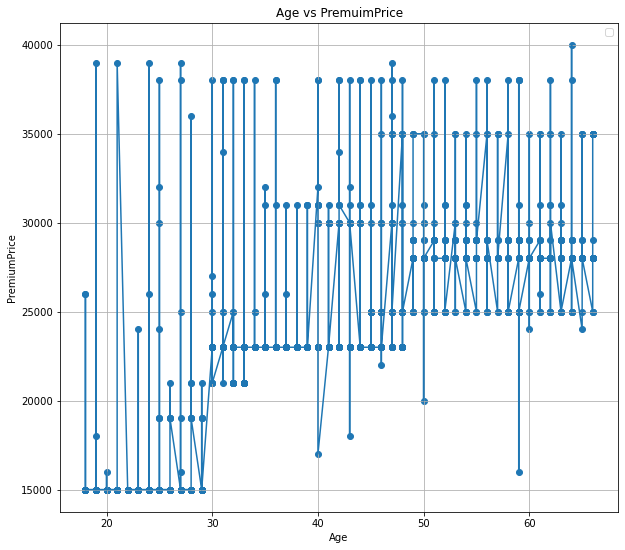

In [228]:
data2 = data.sort_values(by='Age')
plt.figure(figsize=(10,9))

plt.plot(data2['Age'],data2['PremiumPrice'])
plt.scatter(data['Age'],data['PremiumPrice'])

plt.legend()
plt.xlabel("Age")
plt.ylabel("PremiumPrice")
plt.title("Age vs PremuimPrice")

plt.grid()
plt.show()

> From the above plot it is visible that the <b>general trend is that the premium is higher for older patients.</b> It is also visible that patients above the age of **30** have a higher premium

In [229]:
Premium = data['PremiumPrice'].where(data['Age']>30).value_counts()
Premium


23000.0    235
28000.0    132
25000.0    101
29000.0     72
30000.0     46
35000.0     41
38000.0     31
31000.0     31
21000.0     18
26000.0      3
32000.0      3
34000.0      2
24000.0      2
22000.0      1
18000.0      1
20000.0      1
36000.0      1
40000.0      1
17000.0      1
16000.0      1
39000.0      1
Name: PremiumPrice, dtype: int64

There are **702 out 986 (approx 72%)** patients whose premium is **above** the average premium of the dataset ie., 23000, and all the patients are above 30 years of age.

### Plotting PremuimPrice vs AnyTransplants 

No handles with labels found to put in legend.


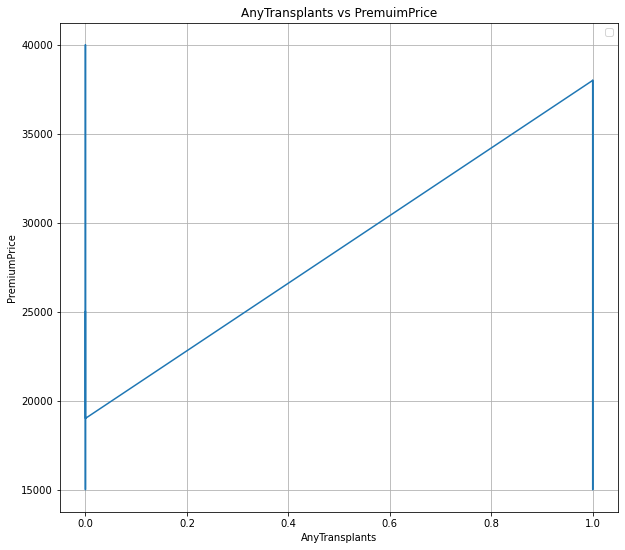

In [230]:
data_trnsplt = data.sort_values(by='AnyTransplants')

plt.figure(figsize=(10,9))

plt.plot(data_trnsplt['AnyTransplants'],data_trnsplt['PremiumPrice'])
#plt.scatter(data['Age'],data['PremiumPrice'])

plt.legend()
plt.xlabel("AnyTransplants")
plt.ylabel("PremiumPrice")
plt.title("AnyTransplants vs PremuimPrice")

plt.grid()
plt.show()

1) As we can see that the general trend is that for **people who had a Transplant before have higher premium** as compared to people who did not have any transplants.

2) Also i think there is a data point where the premium is max without having any transplant history. There may be other factors contributing to the increased premium. Let's check! 

In [231]:
max(data['PremiumPrice'].where(data['AnyTransplants']==0))

40000.0

In [232]:
data[data['PremiumPrice']==40000]

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
295,64,1,1,0,1,163,91,0,0,2,40000


So there is one patient whose age is 64 and the premium of 40000 seems **justified** as he/she has had BP problems,Diabetes, Chronic Diseases and 2 Major surgeries. Also the weight is on the higher side.

### Plotting PremuimPrice vs NumberOfMajorSurgeries

No handles with labels found to put in legend.


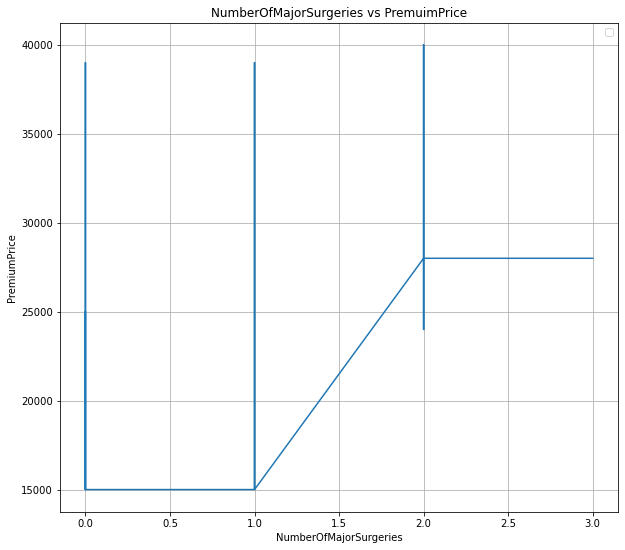

In [233]:
maj_surg = data.sort_values(by='NumberOfMajorSurgeries')

plt.figure(figsize=(10,9))

plt.plot(maj_surg['NumberOfMajorSurgeries'],maj_surg['PremiumPrice'])
#plt.scatter(data['Age'],data['PremiumPrice'])

plt.legend()
plt.xlabel("NumberOfMajorSurgeries")
plt.ylabel("PremiumPrice")
plt.title("NumberOfMajorSurgeries vs PremuimPrice")

plt.grid()
plt.show()

As we can see that **as the Number of surgeries increase the premium price is also elevated.** Some cases have higher than average premium for less number of surgeries, this can indicate that the patient could have other factors contributing to the increased premium. 

In [234]:
Premium = data['PremiumPrice'].where(data['NumberOfMajorSurgeries']>1).value_counts()
Premium

28000.0    132
24000.0      1
30000.0      1
40000.0      1
Name: PremiumPrice, dtype: int64

### Plotting PremuimPrice vs AnyChronicDiseases

No handles with labels found to put in legend.


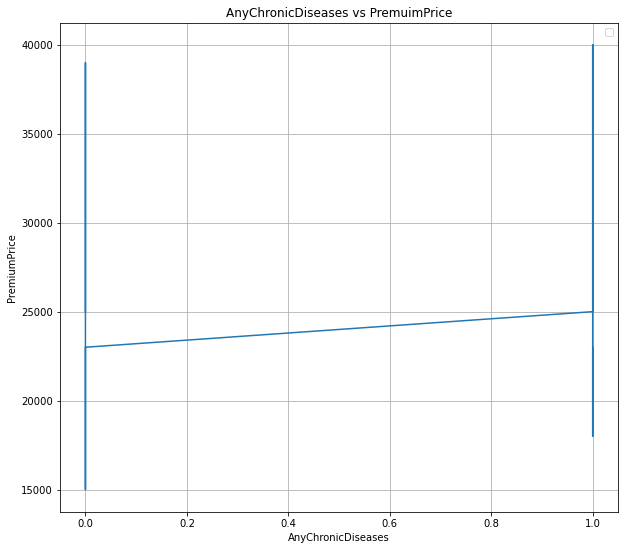

In [235]:
chr_disea = data.sort_values(by='AnyChronicDiseases')

plt.figure(figsize=(10,9))

plt.plot(chr_disea['AnyChronicDiseases'],chr_disea['PremiumPrice'])
#plt.scatter(data['Age'],data['PremiumPrice'])

plt.legend()
plt.xlabel("AnyChronicDiseases")
plt.ylabel("PremiumPrice")
plt.title("AnyChronicDiseases vs PremuimPrice")

plt.grid()
plt.show()

As this is a binary feature, it is visible that **people who have Chronic disease have a slightly higher premium** as compared to people who do not have any Chronic disease.

### Plotting PremuimPrice vs Weight

No handles with labels found to put in legend.


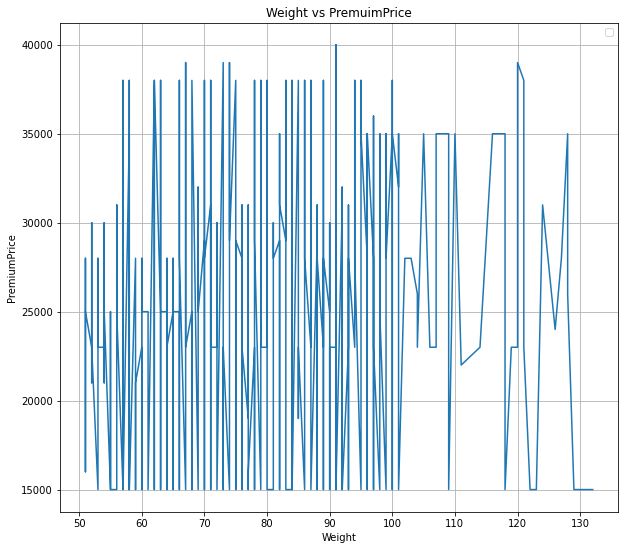

In [236]:
wght = data.sort_values(by='Weight')

plt.figure(figsize=(10,9))

plt.plot(wght['Weight'],wght['PremiumPrice'])
#plt.scatter(data['Age'],data['PremiumPrice'])

plt.legend()
plt.xlabel("Weight")
plt.ylabel("PremiumPrice")
plt.title("Weight vs PremuimPrice")

plt.grid()
plt.show()

From this plot it is not very clear that weight contributes in the increase of the premium. But, according to common logic weight may be an indirect feature that contributes to the premium as people with weight on the higher side tend to suffer with common problems such as BP and chronic diseases which directly contribute to the premium


## Conclusion after EDA

#### After performing Exploratory data analysis on the data we can come to conclusion about which factors play an important role in determining the premium of the patient. 

According to me there are **Six** factors that play an important role in deciding the premium:
**Features ranked according to their importance in descending order. Most important first.**

1) **Age**: Age is the most important feature in determining the preium price. We have seen that people above the age of 30 have a higher average premium. The maximum premium of 40000 is of the person with an age of 63. Also as age increases people tend to have more and more health issues. As a result more premium

2) **AnyTransplants**: After age, AnyTransplants is the second most important feature. As the number of transplants increase the premium also increases.

3) **NoOfMajorSurgeries**: Number of Major surgeries is also an important feature in determining the premium price. Higher the number of surgeries, higher the premium.

4) **AnyChronicDiseases**: This is a binary feature. If any person suffers with a chronic disease, the premium charged is also higher.

5) **BloodPressureProblems**: This is a binary feature. If any person suffers with a BP problems, the premium charged is also higher. 

6) **Weight**: This is not the most important feature but still plays an important in determining other factors and indirectly affects the premium price. Usually if the weight is on the higher side, the person suffers with BP problems, some chronic diseases and hence the premium is higher.

### Method 2: To check which factors play an important role in determining the premium of the patient we can just build a Logistic regression model and check the feature importances to get the most important features

In [237]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer


In [238]:
Y=data['PremiumPrice'].values
X=data.drop(["PremiumPrice"],axis=1)
X.head(2)

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries
0,45,0,0,0,0,155,57,0,0,0
1,60,1,0,0,0,180,73,0,0,0


In [239]:
# train test split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)

In [246]:
'''sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)'''

min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform (X_test)

In [247]:
clf = LogisticRegression(random_state=0).fit(X_train, Y_train)

In [248]:
y_pred = clf.predict(X_test)

Feature: 0, Score: -8.54682
Feature: 1, Score: 0.00202
Feature: 2, Score: -0.57119
Feature: 3, Score: 0.05912
Feature: 4, Score: -2.64284
Feature: 5, Score: 0.03314
Feature: 6, Score: -0.23212
Feature: 7, Score: -0.20021
Feature: 8, Score: -0.52290
Feature: 9, Score: -0.78711


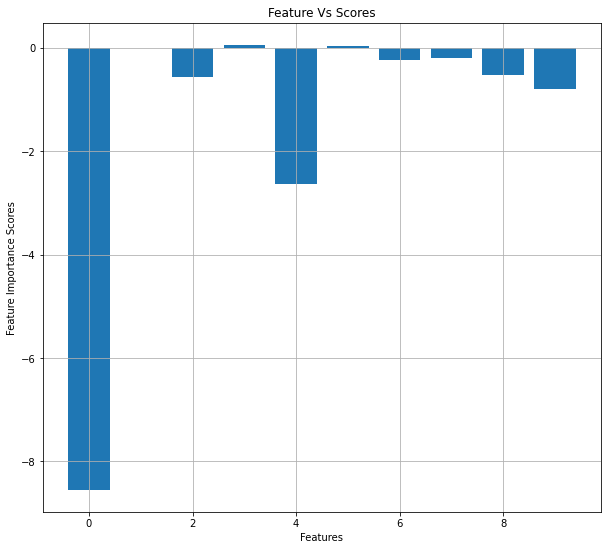

In [249]:
#https://machinelearningmastery.com/calculate-feature-importance-with-python/
# getting importance
importance = clf.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(10,9))
plt.bar([x for x in range(len(importance))], importance)
plt.xlabel("Features")
plt.ylabel("Feature Importance Scores")
plt.title("Feature Vs Scores")
plt.grid()
plt.show()

Here 
<li>Feature 0: Age</li>
<li>Feature 1: Diabetes</li>
<li>Feature 2: BloodPressureProblems</li>
<li>Feature 3: AnyTransplants</li>
<li>Feature 4: AnyChronicDiseases</li>
<li>Feature 5: Height</li>
<li>Feature 6: Weight</li>
<li>Feature 7: KnownAllergies</li>
<li>Feature 8: HistoryOfCancerInFamily</li>
<li>Feature 9: NumberOfMajorSurgeries</li>


### Conclusion:
The model determines **Age** as the biggest feature that is important in predicting the Premium of the user.

Along with age the second most important feature is **Diabetes**.
